<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/Resnet_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#here we will generate 34 layer resnet layer
#here we will first import the dependencies

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Input,MaxPool2D,BatchNormalization,concatenate
from keras.models import Model
from IPython.display import display,Image
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.utils import plot_model
from tensorflow.keras.models import Sequential

In [16]:
#here a 34 layer resent architecture is made
'''
class Resnet1_architecture():
  def __init__(self,input_size,output_shape):
    self.model=None
    self.input_size=input_size
    self.activation='relu'
    self.padding='same'
    self.kernel_size=(3,3)
    self.output_shape=output_shape

  def resnet_block_layer(self,num_filters,input_layer):
    x=Conv2D(num_filters,self.kernel_size,strides=2,padding=self.padding,activation=self.activation)(input_layer)
    y=Conv2D(num_filters,self.kernel_size,strides=2,padding=self.padding,activation=self.activation)(x)
    z=concatenate([y,input_layer])
    return z




  def build_model(self):
    input_layer=Input(shape=self.input_size)
    x=Conv2D(64,7,strides=2,padding=self.padding,activation=self.activation)(input_layer)
    y=MaxPool2D()(x)
    z=self.resnet_block_layer(64,y)
    a=self.resent_block_layer(64,z)
    b=self.resent_block_layer(64,a)
    a1=Conv2D(128,3,strides=2,padding=self.padding,activation=self.activation)(b)
    a2=Conv2D(128,3,strides=1,padding=self.padding,activation=self.activation)(a1)
    a3=concatenate([a2,b])
    a4=self.resent_block_layer(128,a3)
    d=self.resent_block_layer(128,a4)
    e=self.resent_block_layer(128,d)

    a11=Conv2D(256,3,strides=2,padding=self.padding,activation=self.activation)(e)
    a21=Conv2D(256,3,strides=1,padding=self.padding,activation=self.activation)(a11)
    a31=concatenate([a21,e])

    a41=self.resnet_block_layer(256,a31)
    a51=self.resent_block_layer(256,a41)
    a61=self.resent_block_layer(256,a51)
    a71=self.resent_block_layer(256,a61)

    a81=Conv2D(512,3,strides=2,padding=self.padding,activation=self.activation)(a71)
    a91=Conv2D(512,3,strides=1,padding=self.padding,activation=self.activation)(a81)
    a101=concatenate([a91,a71])

    a111=self.resnet_block_layer(512,a101)
    a121=self.resent_block_layer(512,a111)

    a141=Dense(4096,activation=self.activation)(a121)
    a151=Dense(4096,activation=self.activation)(a141)
    a161=Dense(self.output_size,activation='softmax')(a151)

    model=Model(inputs=input_layer,outputs=a161)

    self.model=model

  def compile_model(self):
    self.model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  def summary_model(self):
    self.model.summary()

  def plot_model(self):
    plot_model(self.model,show_shapes=True)

'''
#in the above code the concatenate layer is not working
#due to the different shapes of the concatenated shape






Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_34 (Conv2D)          (None, 112, 112, 64)         9472      ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 64)           0         ['conv2d_34[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_35 (Conv2D)          (None, 56, 56, 64)           36928     ['max_pooling2d_3[0][0]'

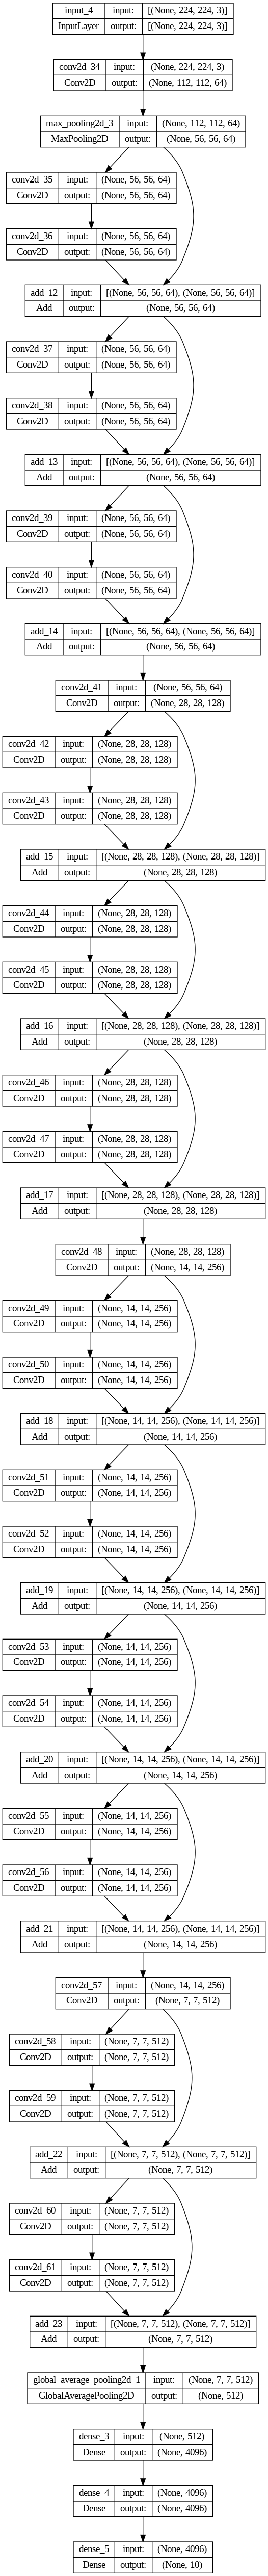

In [18]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, concatenate, Add, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

class Resnet_architecture():
    def __init__(self, input_size, output_shape):
        self.model = None
        self.input_size = input_size
        self.activation = 'relu'
        self.padding = 'same'
        self.kernel_size = (3, 3)
        self.output_shape = output_shape

    def resnet_block_layer(self, num_filters, input_layer):
        x = Conv2D(num_filters, self.kernel_size, strides=1, padding=self.padding, activation=self.activation)(input_layer)
        y = Conv2D(num_filters, self.kernel_size, strides=1, padding=self.padding, activation=self.activation)(x)
        z = Add()([y, input_layer])
        return z

    def build_model(self):
        input_layer = Input(shape=self.input_size)
        x = Conv2D(64, (7, 7), strides=2, padding=self.padding, activation=self.activation)(input_layer)
        y = MaxPool2D(pool_size=(3, 3), strides=2, padding=self.padding)(x)

        z = self.resnet_block_layer(64, y)
        z = self.resnet_block_layer(64, z)
        z = self.resnet_block_layer(64, z)

        z = Conv2D(128, (1, 1), strides=2, padding=self.padding, activation=self.activation)(z)
        z = self.resnet_block_layer(128, z)
        z = self.resnet_block_layer(128, z)
        z = self.resnet_block_layer(128, z)

        z = Conv2D(256, (1, 1), strides=2, padding=self.padding, activation=self.activation)(z)
        z = self.resnet_block_layer(256, z)
        z = self.resnet_block_layer(256, z)
        z = self.resnet_block_layer(256, z)
        z = self.resnet_block_layer(256, z)

        z = Conv2D(512, (1, 1), strides=2, padding=self.padding, activation=self.activation)(z)
        z = self.resnet_block_layer(512, z)
        z = self.resnet_block_layer(512, z)

        z = GlobalAveragePooling2D()(z)
        z = Dense(4096, activation=self.activation)(z)
        z = Dense(4096, activation=self.activation)(z)
        output_layer = Dense(self.output_shape, activation='softmax')(z)

        self.model = Model(inputs=input_layer, outputs=output_layer)

    def compile_model(self):
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    def summary_model(self):
        self.model.summary()

    def plot_model(self):
        plot_model(self.model, show_shapes=True,show_layer_names=True,to_file='file.png')
        display(Image(filename='file.png'))


# Example usage:
model = Resnet_architecture(input_size=(224, 224, 3), output_shape=10)
model.build_model()
model.compile_model()
model.summary_model()
model.plot_model()
